# 911 Calls Capstone project
This dataset can be found on kaggle at :(https://www.kaggle.com/mchirico/montcoalert)

- The first thing we will do is import our libraries

In [1]:
import pandas as pd
import numpy as np  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- Then, we import our dataset and breifly inspect it

In [3]:
pwd

'C:\\Users\\USER\\Documents\\coder'

In [4]:
df=pd.read_csv('911.csv')

In [5]:
df.info

<bound method DataFrame.info of              lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWE

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


 Time to get to know our dataset better


In [8]:
df['zip'].value_counts().head() # for top five zipcodes for 911 calls

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head() # for top five township(twp) for the calls

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
df['title'].nunique() # to check for number of unique title codes

110

We will add a little feature now for easier grouping

In [11]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0]) # this will help us group the reasons for the calls

In [12]:
#now let's see what we've done
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Now for some visualization

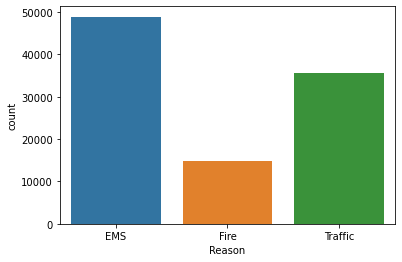

In [14]:
# to create a countplot by 'Reason'
sns.countplot(x ='Reason', data =df)

In [15]:
# let's convert our timestamp from string to datetime 
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [16]:
# checking
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
# now let's create new columns grouped by hour, month, and days pf the week(day)
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [20]:
# let's assign strings to the days
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].map(dmap)

Day(day of the week) Vs Reason

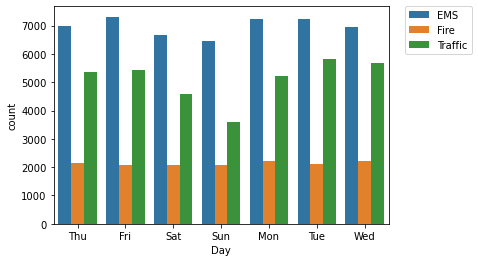

In [23]:
sns.countplot(x='Day',data=df,hue='Reason')

# this looks a little crowded, let's shift the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [25]:
#let's group by month,we'll create a groupby object
byMonth = df.groupby('Month').count()

In [26]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


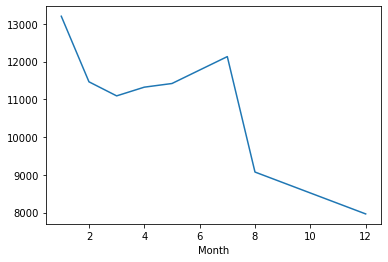

In [33]:
byMonth['twp'].plot() # Note this is call count per month

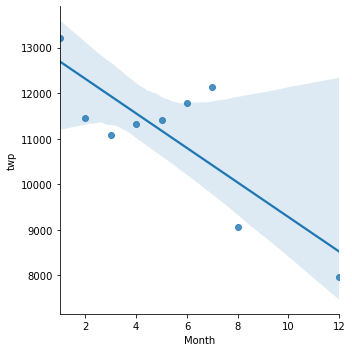

In [34]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [35]:
df['date'] =df['timeStamp'].apply(lambda t : t.date()) # we're using this to create a new column from timeStamp

Now let's groupby this  column  and create a plot of counts of 911 calls

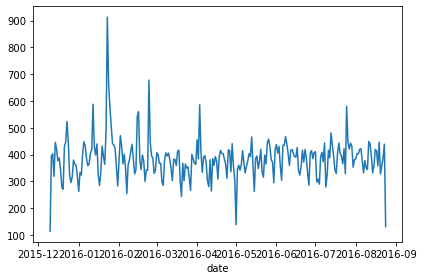

In [37]:
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

Caused by Traffic:

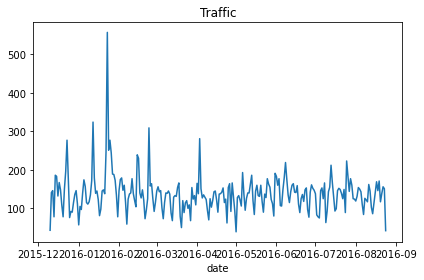

In [38]:
df[df['Reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

Caused by Fire;


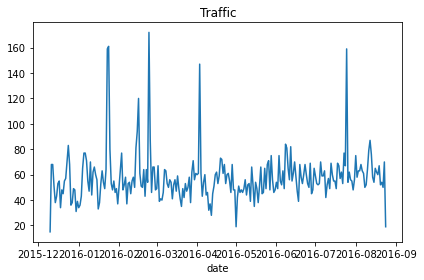

In [39]:
df[df['Reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

Caused by EMS:

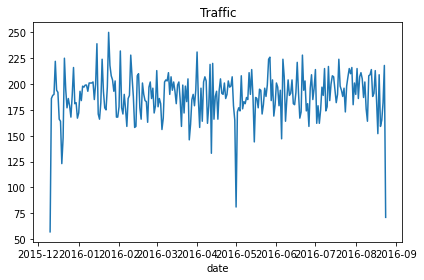

In [40]:
df[df['Reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()